# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mefs/glucose_lactate/"

# II] Glucose

In [5]:
%%time
# DL data ATG7 isoform expression
df_glu = pandas.read_csv(path+'glucose_exp1.csv', sep = ";")
print(df_glu)
df_glu = df_glu.T
df_glu.reset_index(inplace=True)
df_glu

   DMSO    WT  0,192116951  0,198963971
0  DMSO    EV  0,234795384  0,236935133
1  DMSO  iso1  0,150235417  0,145070833
2  DMSO  iso2  0,266816012  0,267570034
3   BAF    WT  0,195960615  0,191987639
4   BAF    EV  0,180185087  0,180751362
5   BAF  iso1  0,137421091  0,146473479
6   BAF  iso2  0,237929391  0,246871058
Wall time: 19.9 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"0,192116951","0,234795384","0,150235417","0,266816012","0,195960615","0,180185087","0,137421091","0,237929391"
3,"0,198963971","0,236935133","0,145070833","0,267570034","0,191987639","0,180751362","0,146473479","0,246871058"


In [6]:
df_glu.reset_index(inplace= True, drop=True)
df_glu_dmso = df_glu.iloc[:,:4]
df_glu_baf = df_glu.iloc[:,4:]

for df in df_glu_dmso, df_glu_baf:
    df.columns = df.iloc[1]

df_glu_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"0,192116951","0,234795384","0,150235417","0,266816012"
3,"0,198963971","0,236935133","0,145070833","0,267570034"


In [7]:
df_glu_dmso = df_glu_dmso.drop(df.index[0:2])
df_glu_baf = df_glu_baf.drop(df.index[0:2])


   cells     value        x
0    WT  0.192117  Glucose
1    WT  0.198964  Glucose
2    EV  0.234795  Glucose
3    EV  0.236935  Glucose
4  iso1  0.150235  Glucose
5  iso1  0.145071  Glucose
6  iso2  0.266816  Glucose
7  iso2  0.267570  Glucose

   cells     value        x
0    WT  0.195961  Glucose
1    WT  0.191988  Glucose
2    EV  0.180185  Glucose
3    EV  0.180751  Glucose
4  iso1  0.137421  Glucose
5  iso1  0.146473  Glucose
6  iso2  0.237929  Glucose
7  iso2  0.246871  Glucose


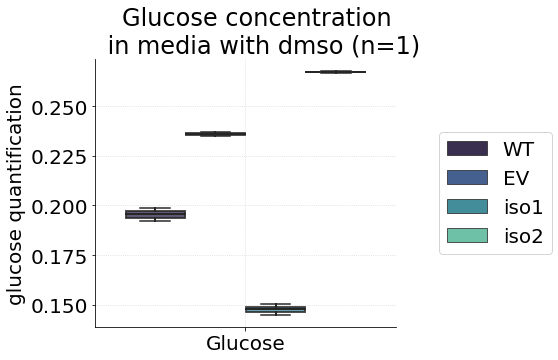

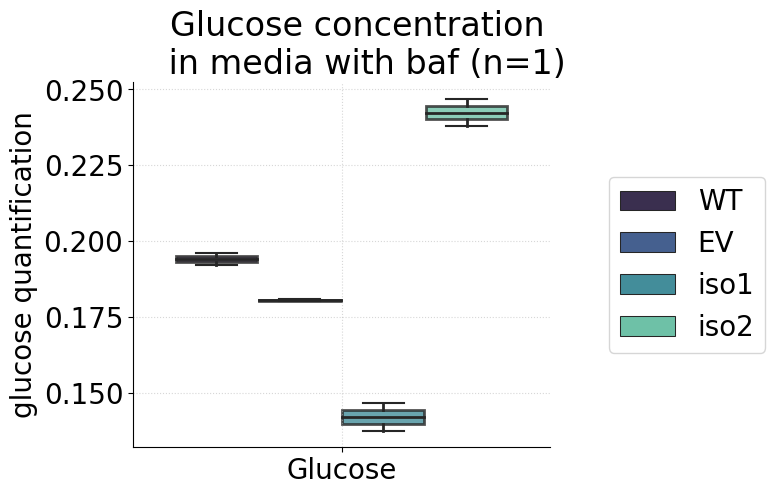

In [8]:
dfs = df_glu_dmso, df_glu_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Glucose'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('glucose quantification')
    plt.xlabel('')
    plt.title('Glucose concentration \n in media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  

# I] Lactate

In [11]:
%%time
# DL data ATG7 isoform expression
df_lact = pandas.read_csv(path+'lactate_exp1.csv', sep = ";")
print(df_lact)
df_lact = df_lact.T
df_lact.reset_index(inplace=True)
df_lact

   DMSO    WT   0,27033714  0,264351003  0,264911578
0  DMSO    EV  0,316706901   0,32495335          NaN
1  DMSO  iso1   0,20354625   0,20437875          NaN
2  DMSO  iso2  0,387998093   0,38228907  0,384847359
3   BAF    WT  0,260872322  0,265260385          NaN
4   BAF    EV  0,247644893   0,24073999  0,242986823
5   BAF  iso1  0,193283086  0,196013403          NaN
6   BAF  iso2  0,361516903  0,355082956          NaN
Wall time: 6.97 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"0,27033714","0,316706901","0,20354625","0,387998093","0,260872322","0,247644893","0,193283086","0,361516903"
3,"0,264351003","0,32495335","0,20437875","0,38228907","0,265260385","0,24073999","0,196013403","0,355082956"
4,"0,264911578",NaN,NaN,"0,384847359",NaN,"0,242986823",NaN,NaN


In [12]:
df_lact.reset_index(inplace= True, drop=True)
df_lact_dmso = df_lact.iloc[:,:4]
df_lact_baf = df_lact.iloc[:,4:]

for df in df_lact_dmso, df_lact_baf:
    df.columns = df.iloc[1]

df_lact_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"0,27033714","0,316706901","0,20354625","0,387998093"
3,"0,264351003","0,32495335","0,20437875","0,38228907"
4,"0,264911578",NaN,NaN,"0,384847359"


In [13]:
df_lact_dmso = df_lact_dmso.drop(df.index[0:2])
df_lact_baf = df_lact_baf.drop(df.index[0:2])


    cells     value        x
0     WT  0.270337  Lactate
1     WT  0.264351  Lactate
2     WT  0.264912  Lactate
3     EV  0.316707  Lactate
4     EV  0.324953  Lactate
6   iso1  0.203546  Lactate
7   iso1  0.204379  Lactate
9   iso2  0.387998  Lactate
10  iso2  0.382289  Lactate
11  iso2  0.384847  Lactate

    cells     value        x
0     WT  0.260872  Lactate
1     WT  0.265260  Lactate
3     EV  0.247645  Lactate
4     EV  0.240740  Lactate
5     EV  0.242987  Lactate
6   iso1  0.193283  Lactate
7   iso1  0.196013  Lactate
9   iso2  0.361517  Lactate
10  iso2  0.355083  Lactate


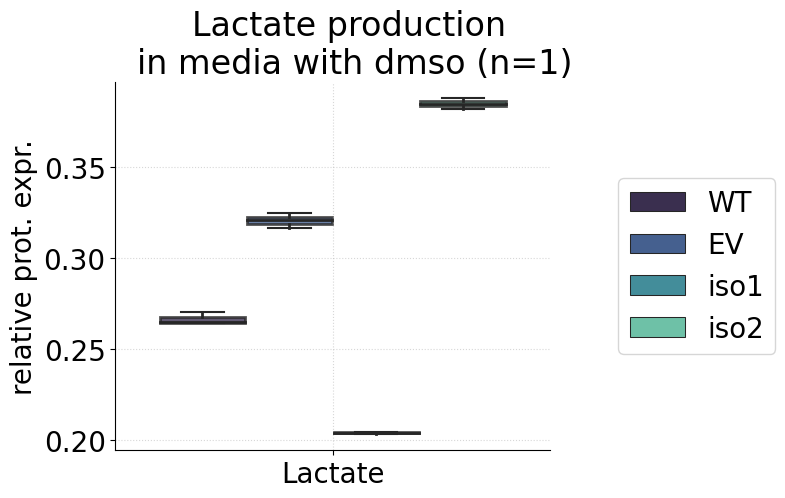

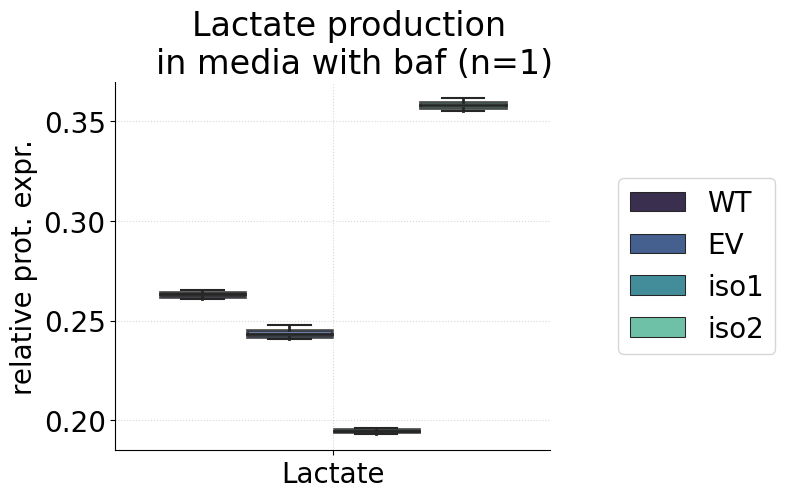

In [14]:
dfs = df_lact_dmso, df_lact_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Lactate'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Lactate production \nin media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  